In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("./heart_disease.csv")

# # เช็คว่าข้อมูลแต่ละช่องมีค่าว่างมั้ย
nan_count = data.isnull().sum().sum()
print('Number of NaN values:', nan_count)
df = data.sample(200)
data = data.dropna()
data.head(10)


Number of NaN values: 645


,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
5,Female,43,primaryschool,0,0.0,0.0,no,1,0,228.0,180.0,110.0,30.30,77.0,99.0,No
6,Female,63,uneducated,0,0.0,0.0,no,0,0,205.0,138.0,71.0,33.11,60.0,85.0,yes
7,Female,45,primaryschool,1,20.0,0.0,no,0,0,313.0,100.0,71.0,21.68,79.0,78.0,No
8,Male,52,uneducated,0,0.0,0.0,no,1,0,260.0,141.5,89.0,26.36,76.0,79.0,No
9,Male,43,uneducated,1,30.0,0.0,no,1,0,225.0,162.0,107.0,23.61,93.0,88.0,No


In [35]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           3656 non-null   object 
 1   age              3656 non-null   int64  
 2   education        3656 non-null   object 
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   object 
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  Heart_ stroke    3656 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 485.6+ KB


In [36]:
object_d = data.dtypes[data.dtypes == 'object'].index.tolist()
object_d

['Gender', 'education', 'prevalentStroke', 'Heart_ stroke']

In [58]:
object = ['Gender','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
for i in object:
    unique_data = data[i].unique()
    # d_count = data[i].value_counts()
    # print(f'{i} = {unique_data}:{d_count}') #เอาค่าไป d_count ไป plot ด้วยจ้าาา
    print(unique_data)

['Male' 'Female']
['postgraduate' 'primaryschool' 'uneducated' 'graduate']
[0 1]
[0. 1.]
['no' 'yes']
[0 1]
[0 1]


In [37]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,3656.0,49.56,8.56,32.00,42.00,49.00,56.00,70.0
currentSmoker,3656.0,0.49,0.50,0.00,0.00,0.00,1.00,1.0
cigsPerDay,3656.0,9.02,11.92,0.00,0.00,0.00,20.00,70.0
BPMeds,3656.0,0.03,0.17,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3656.0,0.31,0.46,0.00,0.00,0.00,1.00,1.0
diabetes,3656.0,0.03,0.16,0.00,0.00,0.00,0.00,1.0
totChol,3656.0,236.87,44.10,113.00,206.00,234.00,263.25,600.0
sysBP,3656.0,132.37,22.09,83.50,117.00,128.00,144.00,295.0
diaBP,3656.0,82.91,11.97,48.00,75.00,82.00,90.00,142.5
BMI,3656.0,25.78,4.07,15.54,23.08,25.38,28.04,56.8


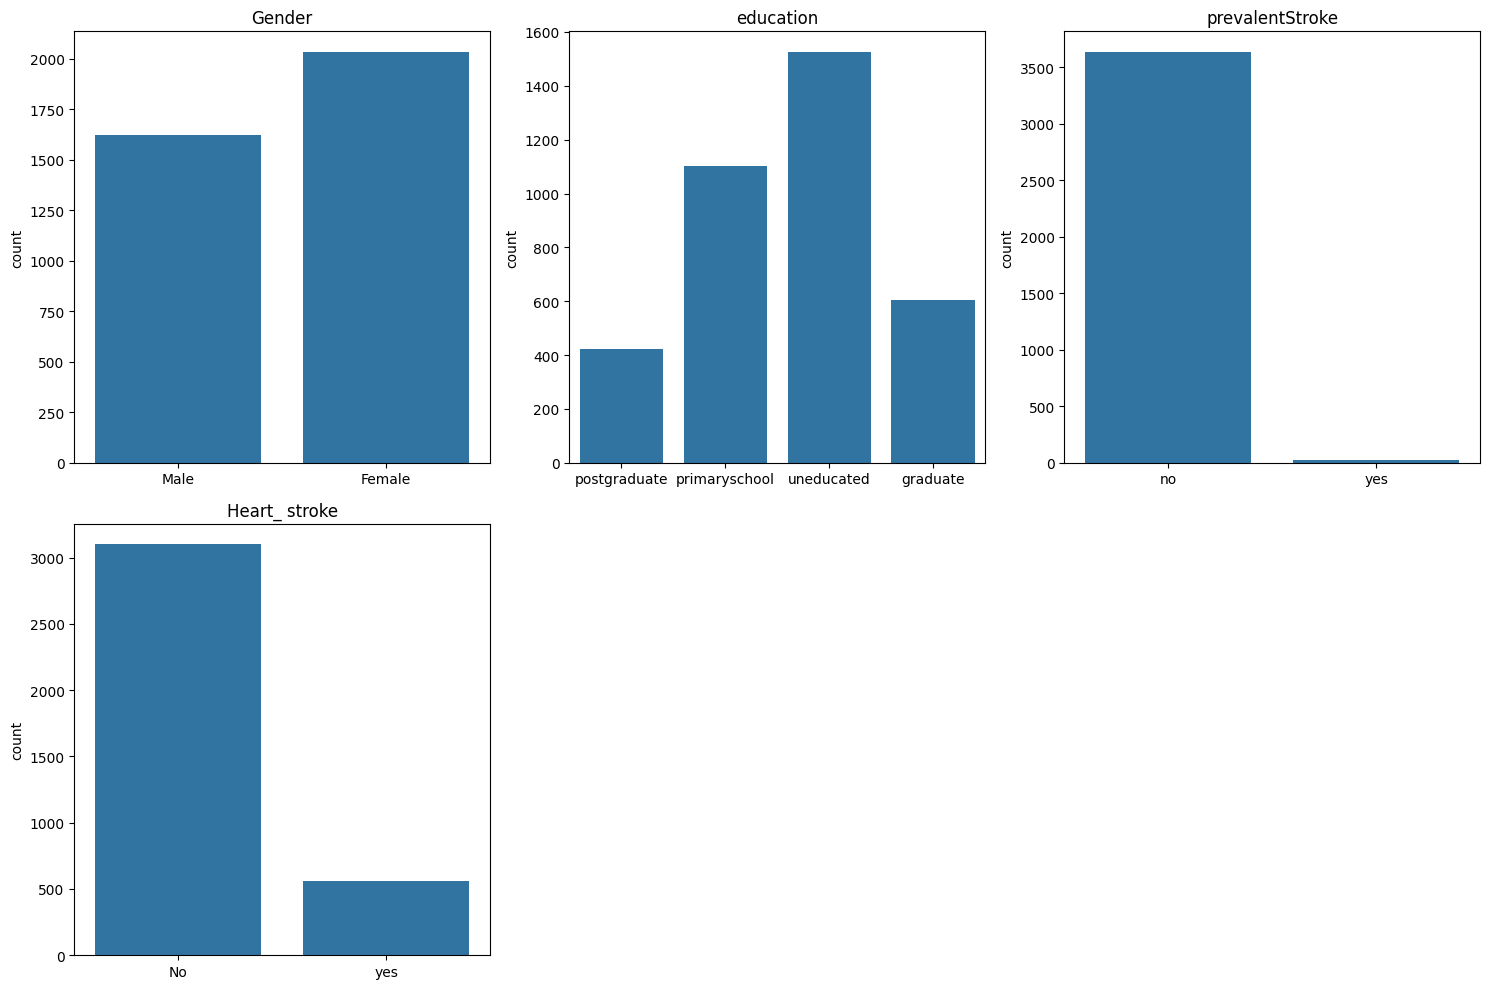

In [38]:
n_cols = 3
n_rows = (len(object_d)+n_cols-1)// n_cols
fig , axes=plt.subplots(n_rows,n_cols, figsize = (5*n_cols,5*n_rows))
for index,column in enumerate(object_d):
    row = index//n_cols
    col = index%n_cols
    sns.countplot(data=data,x=column,ax=axes[row,col])
    axes[row,col].set_title(f'{column}')
    axes[row,col].set_xlabel('')
    axes[row,col].set_ylabel('count')
if len(object_d) < n_rows * n_cols:
    for idx in range(len(object_d), n_rows * n_cols):
        fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()

จากข้อมูลการเป็นโรคหัวใจจะมีความเสี่ยงน้อยมากกว่าความเสี่ยงมาก ซึ่งก็เป็นปกติเพราะส่วนมากคนปกติมีความเสี่ยงที่จะเป็นโรคน้อยอยู่แล้วทำให้เกิด bias เลยต้องทำ sensitivity

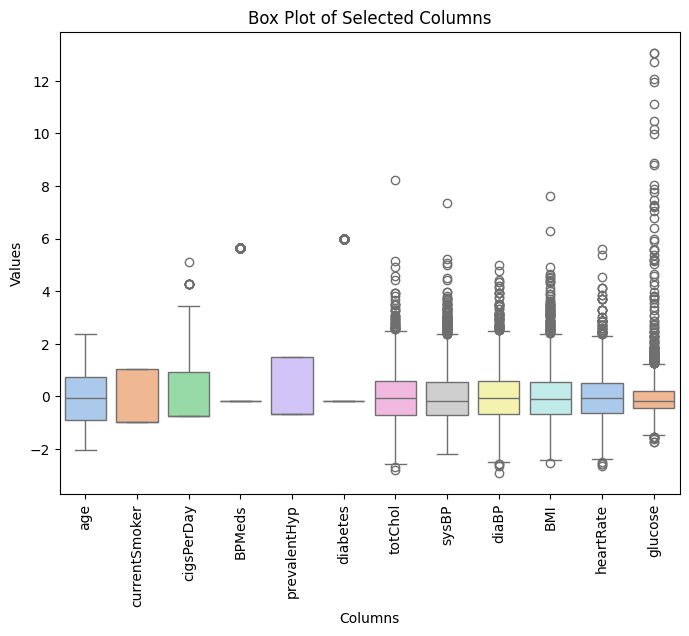

In [39]:
data_n = data.select_dtypes(include='number')
data_D = (data_n-data_n.mean())/data_n.std()
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_D, palette='pastel')


plt.title('Box Plot of Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)

plt.show()
# box plot ทำไปเพื่อดู feature outliner อันที่มีวงกลม

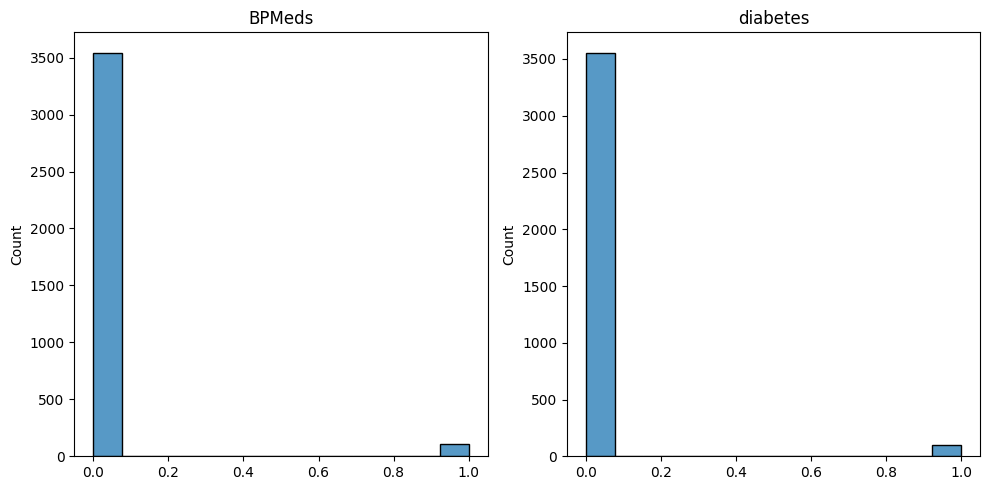

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 2  # จำนวนคอลัมน์
outlier_d = ['BPMeds','diabetes']
n_rows = 1  # ใช้แค่ 1 แถว

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))  # สร้าง subplots 1 row, 3 columns

for index, column in enumerate(outlier_d):
    sns.histplot(data=data, x=column, ax=axes[index])  # ใช้ axes[index] แทน row/col
    axes[index].set_title(f'{column}')
    axes[index].set_xlabel('')
    axes[index].set_ylabel('Count')

plt.tight_layout()
plt.show()


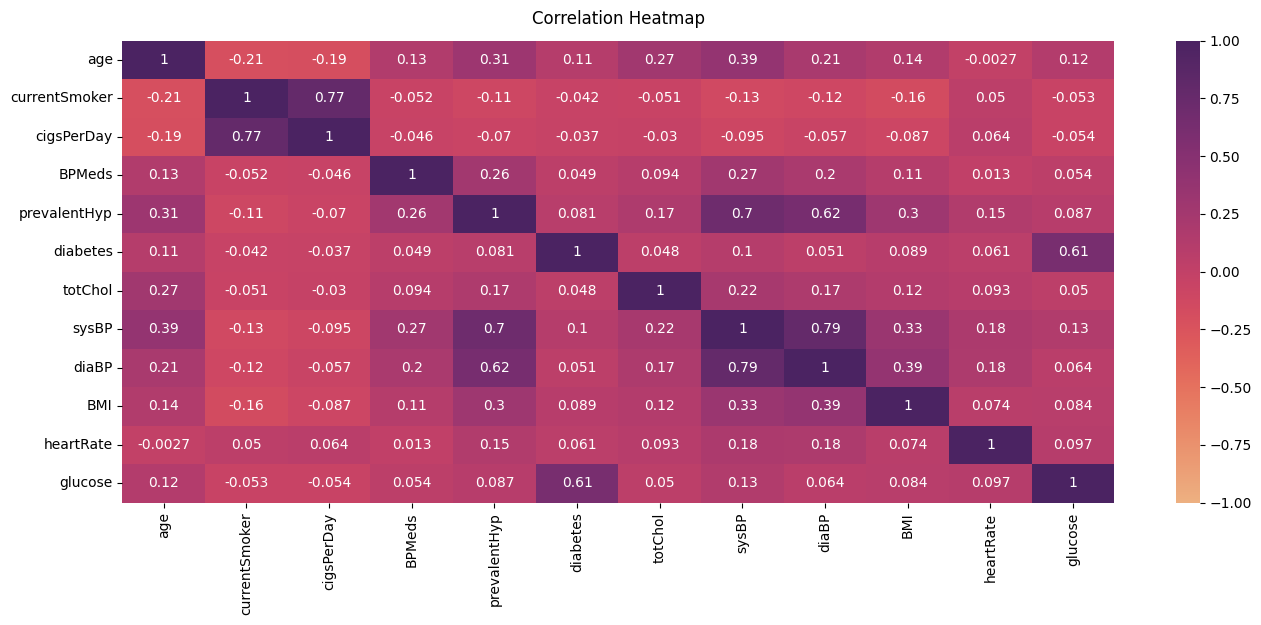

In [42]:
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data_n.corr(),cmap='flare', vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

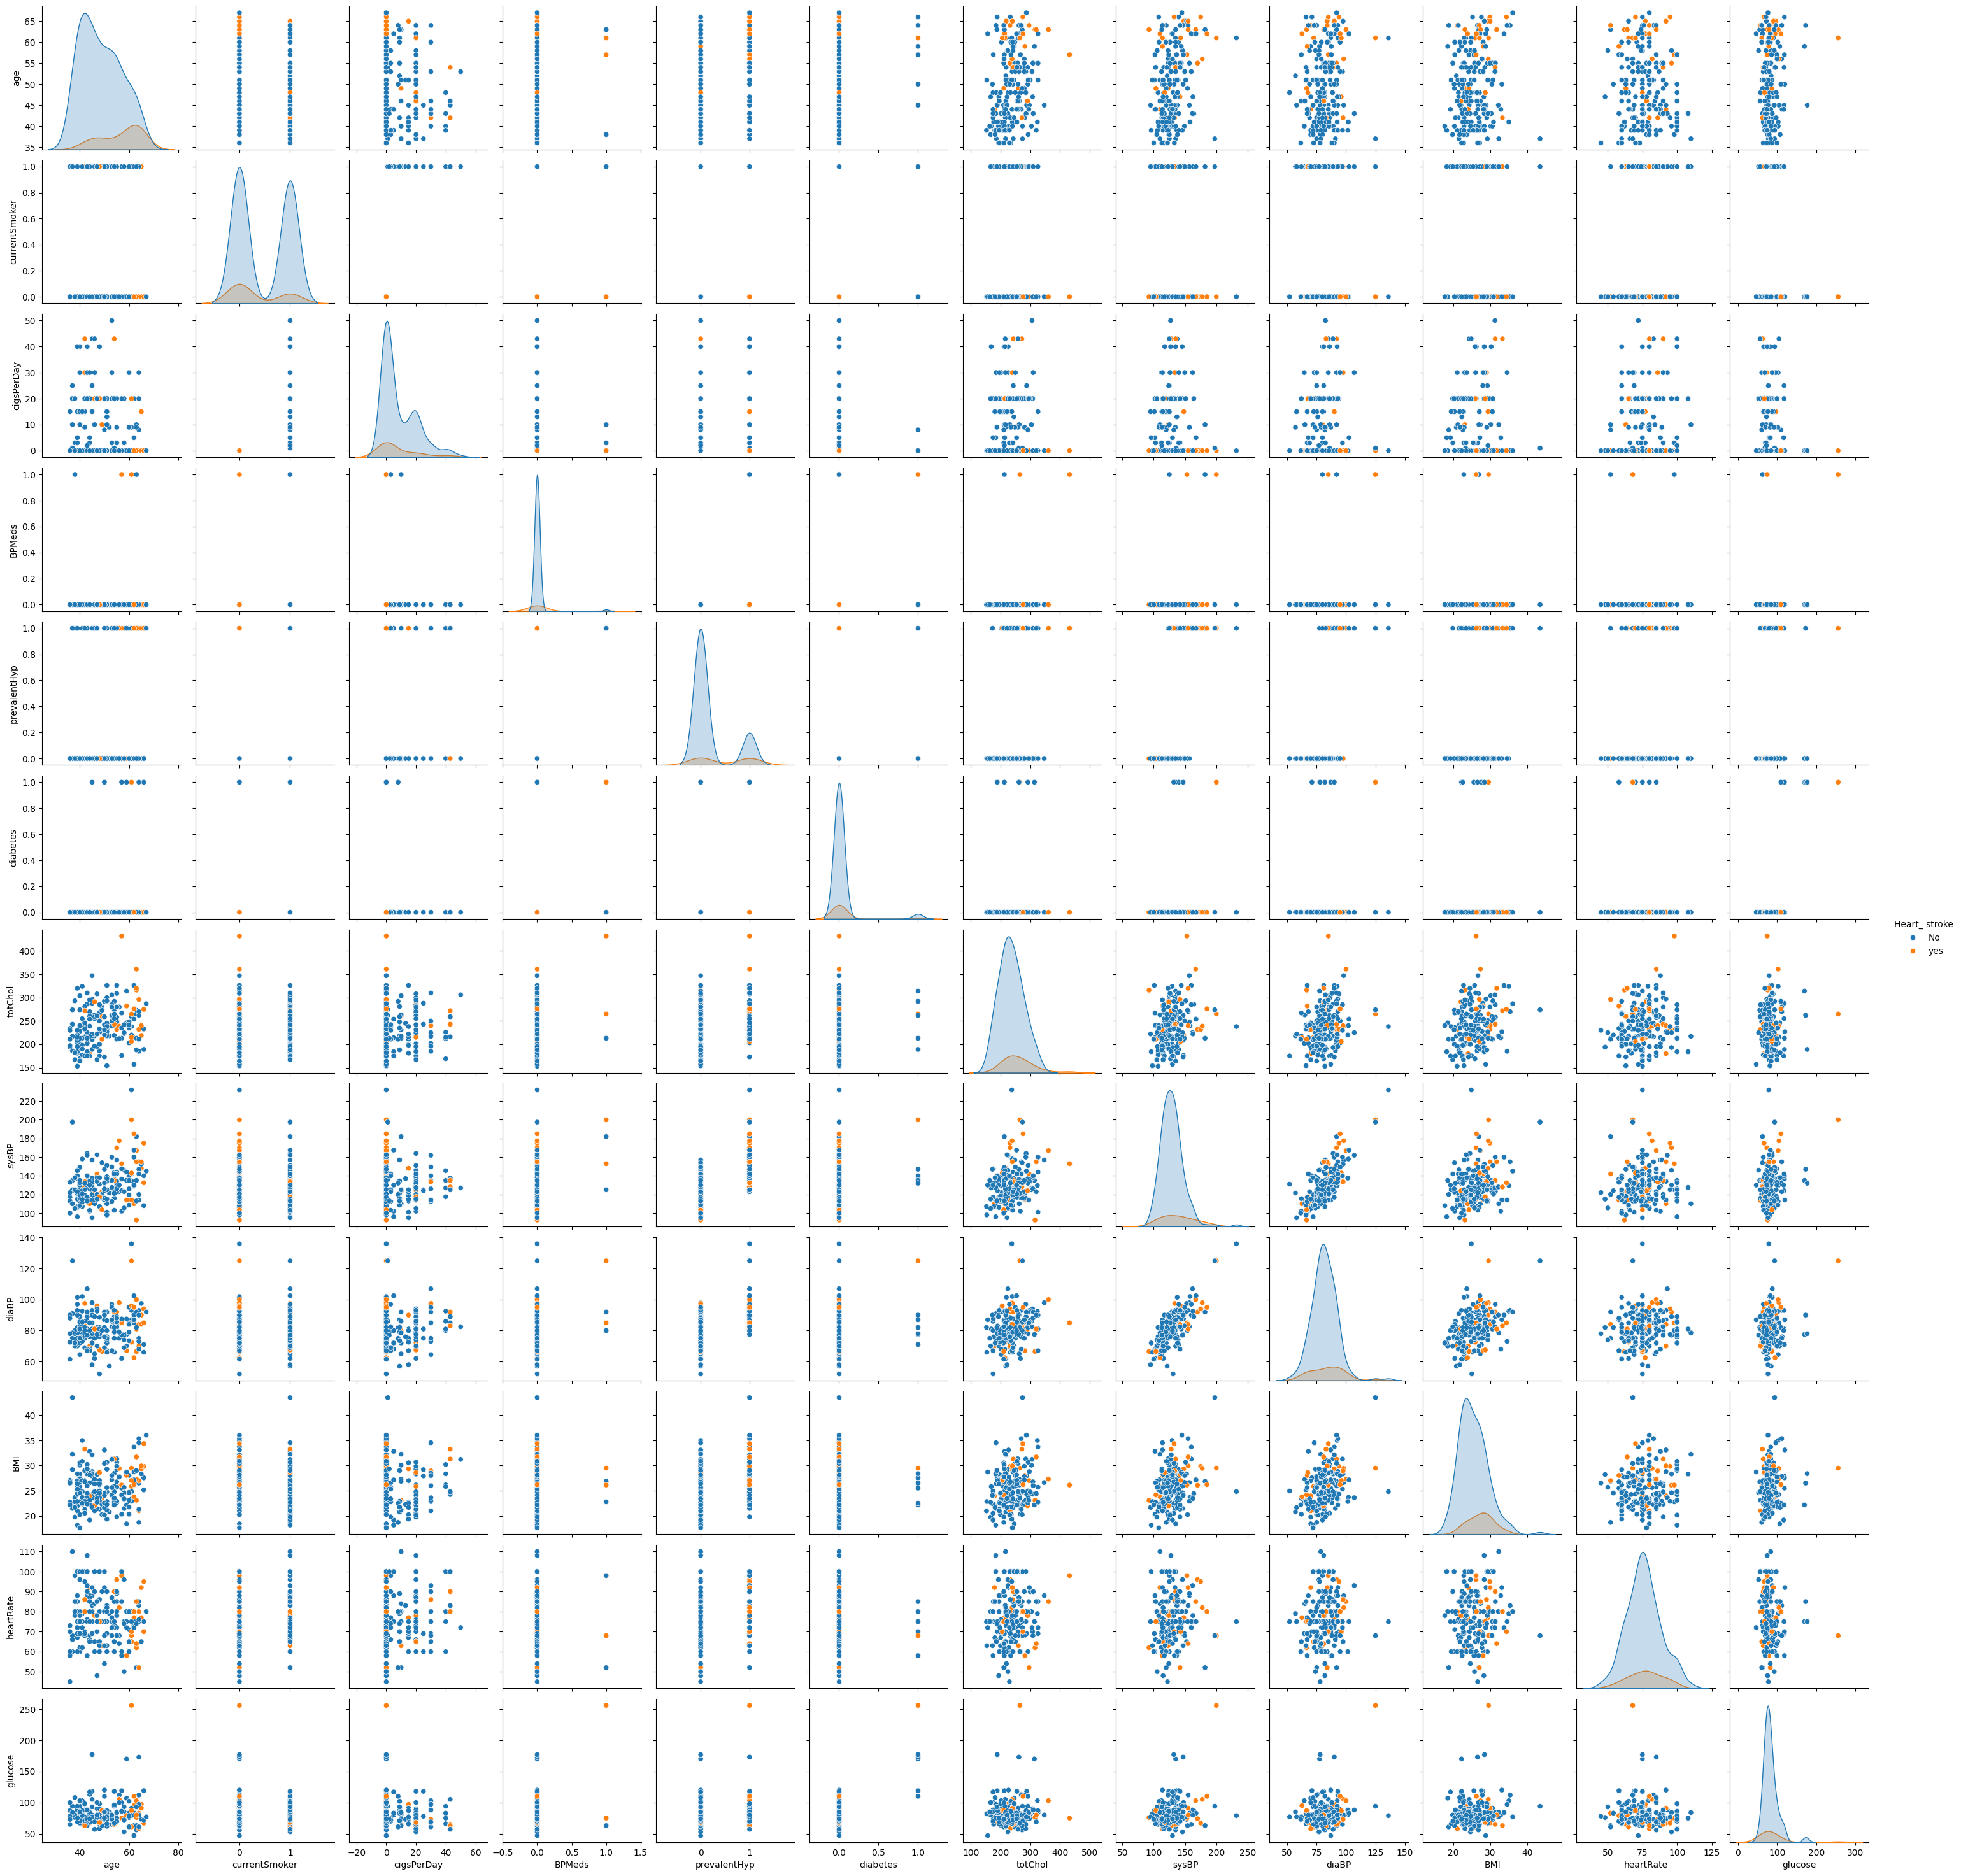

In [45]:
Data_plot = df.select_dtypes(include='number')
tar_get = 'Heart_ stroke'
Data_plot[tar_get] = df[tar_get]

# ใช้ pairplot = plot เทียบระหว่าง feature เฉพาะคอลัมน์ที่เป็นตัวเลข
sns.pairplot(Data_plot, hue=tar_get)
# จากรูป data ไม่ได้มี pattern แบบ correlation กันเนื่องจาก data ส่วนใหญ่เป็น 0 และ 1 ทำให้ linear แก้ไม่ได้เลยตัดปัญหาการแก้โดยใช้ linear ออกไปเพราะ data ไม่มี correlation กัน

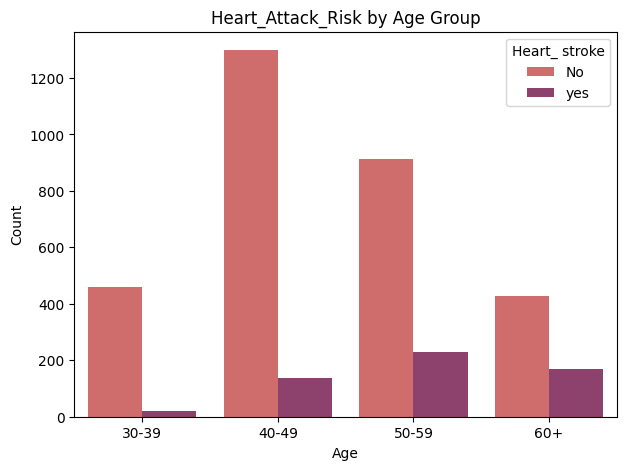

In [48]:
df_copy = data.copy()
bins = [30, 40, 50, 60, 70]
labels = ['30-39', '40-49', '50-59', '60+']
df_copy['Age Group'] = pd.cut(df_copy['age'], bins=bins, labels=labels, right=False)
color_t  = 'flare'
# Create the countplot with custom colors
plt.figure(figsize=(7, 5))
sns.countplot(data=df_copy, x='Age Group', hue=tar_get, palette=color_t)
plt.title('Heart_Attack_Risk by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title=tar_get)
plt.show()

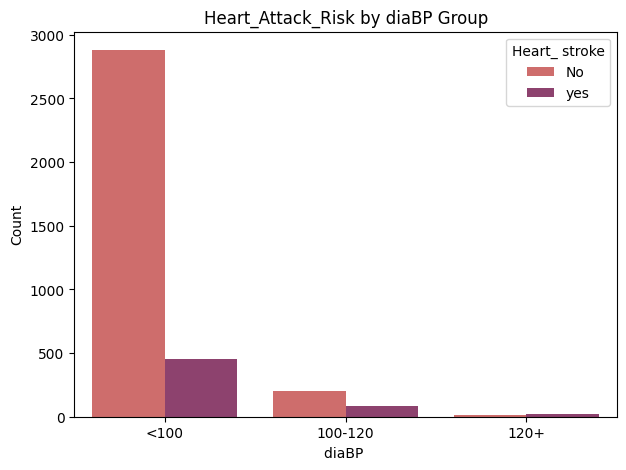

In [50]:
bins = [ 48,100,120,143]
labels = ['<100', '100-120', '120+']
df_copy['diaBP Group'] = pd.cut(df_copy['diaBP'], bins=bins, labels=labels, right=False)

# Create the countplot with custom colors
plt.figure(figsize=(7, 5))
sns.countplot(data=df_copy, x='diaBP Group', hue=tar_get, palette=color_t)
plt.title('Heart_Attack_Risk by diaBP Group')
plt.xlabel('diaBP ')
plt.ylabel('Count')
plt.legend(title=tar_get)
plt.show()

อัตราความจะเป็น:
Smoking Group
Smoking        15.939597
not Smoking    14.561028
Name: count, dtype: float64


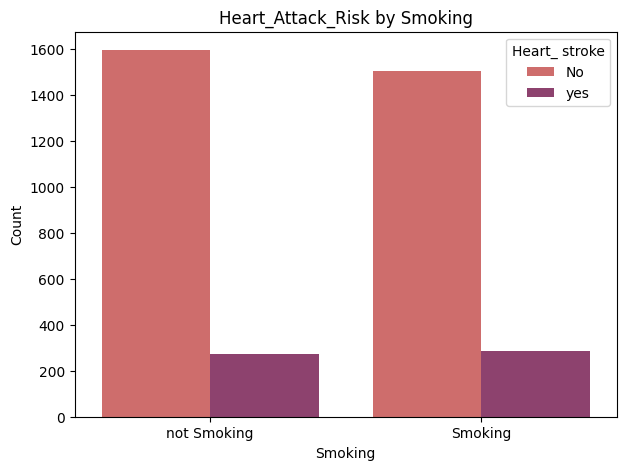

In [52]:
df_copy['Smoking Group'] = df_copy['currentSmoker'].map({0: 'not Smoking', 1: 'Smoking'})
# นับจำนวนทั้งหมดในแต่ละกลุ่ม (สูบ vs ไม่สูบ)
total_counts = df_copy['Smoking Group'].value_counts()

# นับจำนวนคนที่มีความเสี่ยงระดับกลางและสูงในแต่ละกลุ่ม
risk_counts = df_copy[df_copy[tar_get].isin([ 'yes'])]['Smoking Group'].value_counts()

# คำนวณเปอร์เซ็นต์ของคนที่มีความเสี่ยงระดับกลางและสูง
risk_percent = (risk_counts / total_counts) * 100

# แสดงผลลัพธ์
print("อัตราความจะเป็น:")
print(risk_percent)
# Create the countplot with custom colors
plt.figure(figsize=(7, 5))
sns.countplot(data=df_copy, x='Smoking Group', hue=tar_get, palette=color_t)
plt.title('Heart_Attack_Risk by Smoking')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title=tar_get)
plt.show()

ไปหาคำสั่ง one hot encoding แล้วเลือก feature ทีเดียวปึ้ง

In [53]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           3656 non-null   object  
 1   age              3656 non-null   int64   
 2   education        3656 non-null   object  
 3   currentSmoker    3656 non-null   int64   
 4   cigsPerDay       3656 non-null   float64 
 5   BPMeds           3656 non-null   float64 
 6   prevalentStroke  3656 non-null   object  
 7   prevalentHyp     3656 non-null   int64   
 8   diabetes         3656 non-null   int64   
 9   totChol          3656 non-null   float64 
 10  sysBP            3656 non-null   float64 
 11  diaBP            3656 non-null   float64 
 12  BMI              3656 non-null   float64 
 13  heartRate        3656 non-null   float64 
 14  glucose          3656 non-null   float64 
 15  Heart_ stroke    3656 non-null   object  
 16  Age Group        3655 non-null   category
 17  